## THE SPARK FOUNDATION (GRIP) INTERNSHIP PROJECT

## SUPERVISED LEARNING

## This Project Aim is to predict the percentage of students based on the number of study hours

## IMPORTING LIBRARIES TO BE USED

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import xgboost as xgb

In [3]:
df = pd.read_csv('data.csv')

In [102]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.shape

(25, 2)

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualizing The Relationship between "Hours" and "Scores" Columns

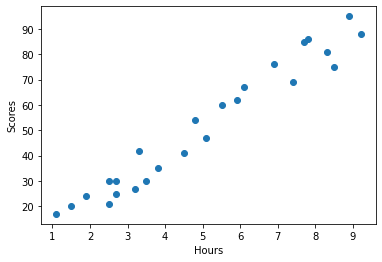

In [13]:
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

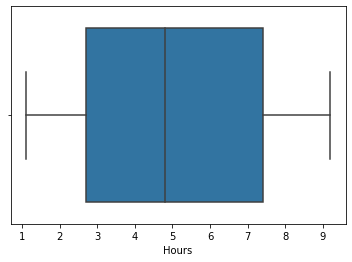

In [21]:
sns.boxplot(x=df['Hours'])
plt.show()

## The Above plot indicates that the more students dedicates their time to study the higher their score........Which means both columns are positve correlated and has no Outliers.

## Data Segmentation

In [54]:
X = df['Hours'].copy()
y = df['Scores'].copy()

In [55]:
X.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [56]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [62]:
X = np.array(X)

In [63]:
y = np.array(y)

## Splitting The Data Into Training And Testing Set

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=58)

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18,), (7,), (18,), (7,))

In [76]:
X_train, X_test, y_train, y_test = X_train.reshape(-1,1), X_test.reshape(-1,1), y_train.reshape(-1,1), y_test.reshape(-1,1)

In [77]:
X_train.ndim

2

In [78]:
y_train.ndim

2

## Applying Standard Scaling

In [79]:
scaler = StandardScaler()

In [81]:
scaler.fit_transform(X_train, y_train)

array([[-0.37856414],
       [-0.79731106],
       [-0.79731106],
       [-1.10185428],
       [-0.60697155],
       [-0.11208882],
       [ 1.10608404],
       [ 1.56289887],
       [-0.49276784],
       [ 1.67710257],
       [ 0.80154083],
       [-1.25412588],
       [ 0.11631859],
       [ 1.14415194],
       [ 0.00211488],
       [-1.40639749],
       [-0.87344686],
       [ 1.41062726]])

## Train And Model Evaluation Using The Linear Regression Algorithm

In [82]:
model = LinearRegression()

In [83]:
model.fit(X_train, y_train)

LinearRegression()

## Making Predictions On The Testing Set And Checking The Score & RMSE

In [84]:
y_pred = model.predict(X_test)

In [85]:
r2_score(y_test, y_pred)

0.8991860923354756

In [86]:
mean_squared_error(y_test, y_pred, squared=False)

5.073708969593472

## The accuracy Score of our model is 0.8991 approximately 90%, and the RMSE is 5%

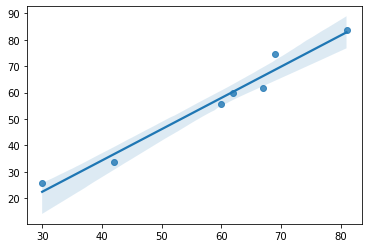

In [108]:
sns.regplot(x=y_test, y=y_pred);

## Predicting the percentage a student who studied for 9.25 hours daily is supposed to get...

In [100]:
model.predict([[9.25]])

array([[93.34318825]])

## According to the Prediction, If a Student studies for 9.25 Hours Daily, The Score He/She is Likely to get is 93.3 